In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_pickle('Group_1_data_cleaned.pkl')

In [3]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
1,0,udp,private,SF,105,146,0.0,0.0,0.0,0.0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,0
2,0,udp,private,SF,105,146,0.0,0.0,0.0,0.0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,0
3,0,udp,private,SF,105,146,0.0,0.0,0.0,0.0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,1
4,0,udp,private,SF,105,146,0.0,0.0,0.0,0.0,...,254,1.0,0.01,0.01,0.0,0.0,0.0,0.0,0.0,1
5,0,udp,private,SF,105,146,0.0,0.0,0.0,0.0,...,255,1.0,0.00,0.01,0.0,0.0,0.0,0.0,0.0,1


In [4]:
df = pd.get_dummies(df,columns=['protocol_type','service','flag','land','wrong_fragment','urgent','logged_in','root_shell',
                                'su_attempted','num_shells','num_access_files','num_outbound_cmds','is_host_login',
                                'is_guest_login'])

In [5]:
df.drop(df.columns[0],axis=1)

,src_bytes,dst_bytes,hot,num_failed_logins,num_compromised,num_root,num_file_creations,count,srv_count,serror_rate,...,num_access_files_0.0,num_access_files_1.0,num_access_files_2.0,num_access_files_3.0,num_access_files_4.0,num_outbound_cmds_0.0,is_host_login_0.0,is_host_login_1.0,is_guest_login_0.0,is_guest_login_1.0
1,105,146,0.0,0.0,0.0,0.0,0.0,1,1.0,0.0,...,1,0,0,0,0,1,1,0,1,0
2,105,146,0.0,0.0,0.0,0.0,0.0,1,1.0,0.0,...,1,0,0,0,0,1,1,0,1,0
3,105,146,0.0,0.0,0.0,0.0,0.0,2,2.0,0.0,...,1,0,0,0,0,1,1,0,1,0
4,105,146,0.0,0.0,0.0,0.0,0.0,2,2.0,0.0,...,1,0,0,0,0,1,1,0,1,0
5,105,146,0.0,0.0,0.0,0.0,0.0,2,2.0,0.0,...,1,0,0,0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311024,105,147,0.0,0.0,0.0,0.0,0.0,2,2.0,0.0,...,1,0,0,0,0,1,1,0,1,0
311025,105,147,0.0,0.0,0.0,0.0,0.0,4,4.0,0.0,...,1,0,0,0,0,1,1,0,1,0
311026,105,147,0.0,0.0,0.0,0.0,0.0,2,2.0,0.0,...,1,0,0,0,0,1,1,0,1,0
311027,105,147,0.0,0.0,0.0,0.0,0.0,4,4.0,0.0,...,1,0,0,0,0,1,1,0,1,0


In [6]:
X = df.iloc[0:].drop('label',axis=1)
y = df[['label']]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 274650 entries, 1 to 311028
Columns: 137 entries, duration to is_guest_login_1.0
dtypes: category(1), float64(21), int64(6), uint8(109)
memory usage: 87.5 MB


In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
model = KNeighborsClassifier()
model.fit(X_train, y_train)

C:\Users\kaush\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [10]:
y_pred = model.predict(X_test)
y_pred

array([0, 1, 0, ..., 0, 1, 0], dtype=int64)

In [11]:
accuracy_score(y_test, y_pred)

0.9766977848331707

In [12]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[12253,   534],
       [ 1066, 54810]], dtype=int64)

sns.heatmap(cm,
           annot=True,
           annot_kws={"size":15},
           xticklabels=['duration','protocol_type'service	flag	src_bytes	dst_bytes	land	wrong_fragment	urgent	...	dst_host_srv_count	dst_host_same_srv_rate	dst_host_diff_srv_rate	dst_host_same_src_port_rate	dst_host_srv_diff_host_rate	dst_host_serror_rate	dst_host_srv_serror_rate	dst_host_rerror_rate	dst_host_srv_rerror_rate],
           yticklabels=['setosa', 'versicolor', 'virginica'])
plt.xlabel('Predicted')
plt.ylabel('Actual');

In [13]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94     12787
           1       0.99      0.98      0.99     55876

    accuracy                           0.98     68663
   macro avg       0.96      0.97      0.96     68663
weighted avg       0.98      0.98      0.98     68663



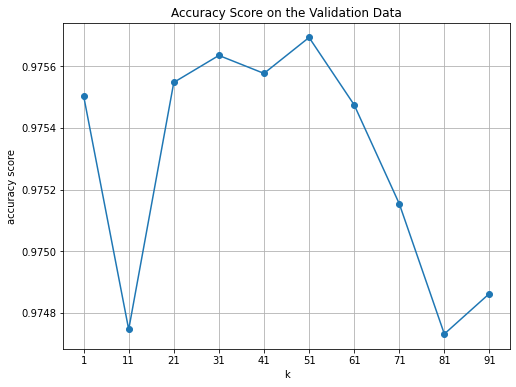

In [16]:
import warnings
warnings.filterwarnings("ignore")

k_values = []
acc_score = []

for k in range(1, 100, 10):
    model = KNeighborsClassifier(n_neighbors = k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc_score.append(accuracy_score(y_test, y_pred))
    k_values.append(k)


plt.figure(figsize = (8, 6))

plt.plot(k_values, acc_score, marker = "o")
plt.title("Accuracy Score on the Validation Data")
plt.xlabel("k")
plt.ylabel("accuracy score")
plt.xticks(k_values)
plt.grid();

In [17]:
m = max(acc_score)
m

0.9756928768041012

In [18]:
k_values[acc_score.index(m)]

51

In [27]:
model = KNeighborsClassifier(n_neighbors = #take above value)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.9756928768041012

In [ ]:
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV

In [21]:
X = df.iloc[0:].drop('label',axis=1)
y = df[['label']]

In [22]:
cv_scores = cross_val_score(KNeighborsClassifier(n_neighbors=10), 
                            X_train, 
                            y_train, 
                            cv=5, # no shuffle, stratified for classifiers, default value 5
                            #cv=KFold(n_splits=5, shuffle=True), 
                            #cv=StratifiedKFold(n_splits=5, shuffle=True),
                            #cv=RepeatedKFold(n_splits=5, n_repeats=3),
                            scoring='accuracy')

cv_scores

array([0.97434341, 0.97604253, 0.97638178, 0.97582348, 0.97567784])

[0.97 0.98 0.98 0.98 0.98]
Average accuracy: 0.9756538078697912
Accuracy standard deviation: 0.0006967834522905099


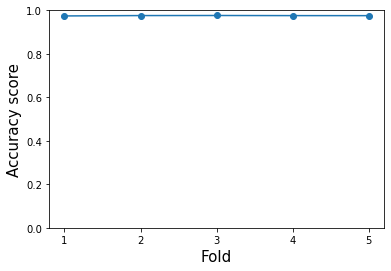

In [23]:
plt.plot(range(1, 6), cv_scores, marker='o')
plt.ylim(0, 1)
plt.ylabel('Accuracy score', fontsize=15)
plt.xlabel('Fold', fontsize=15)
plt.xticks(range(1,6))

print(np.round(cv_scores,2))
print('Average accuracy:', cv_scores.mean())
print('Accuracy standard deviation:', cv_scores.std());  

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingRegressor


model = KNeighborsClassifier()

parameters = {"n_neighbors": range(2, 100,10),
              "weights": ["uniform", "distance"]}

gridsearch_knnreg = GridSearchCV(KNeighborsClassifier(), parameters, cv=5)
gridsearch_knnreg.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
print(gridsearch_knnreg.best_params_)

print(gridsearch_knnreg.best_score_)

In [ ]:
hypertuned_knn = KNeighborsClassifier(#put the best params from above)
hypertuned_knn.fit(X_train, y_train)

In [ ]:
y_pred = hypertuned_knn.predict(X_test)
y_pred

print(classification_report(y_test, y_pred))

accuracy_score(y_test,y_pred)